In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df= pd.read_csv('E:Unemployment.csv')

In [10]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [27]:
df.rename(columns={'Region':'State'},inplace=True)
df.rename(columns={' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)','Region.1':'Region'},inplace=True)

In [28]:
df.columns

Index(['State', ' Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_19224\3314275445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


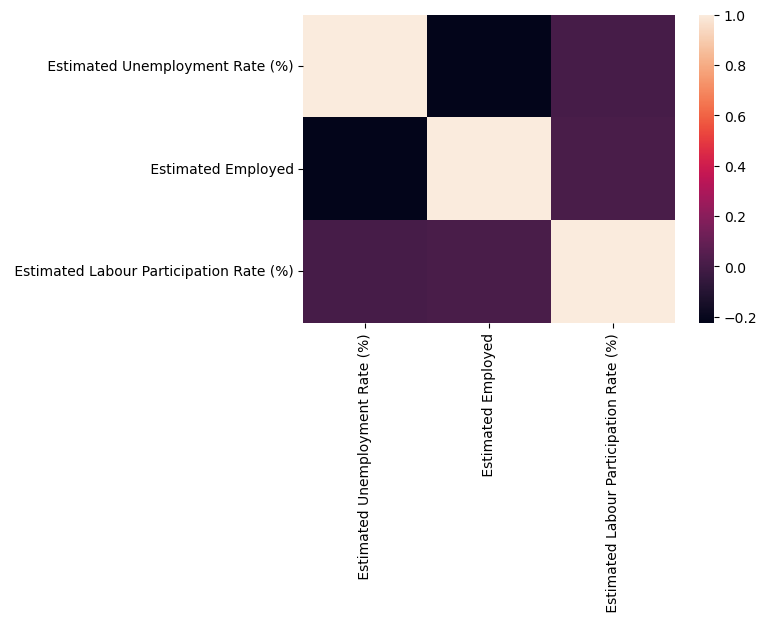

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr())
plt.show()


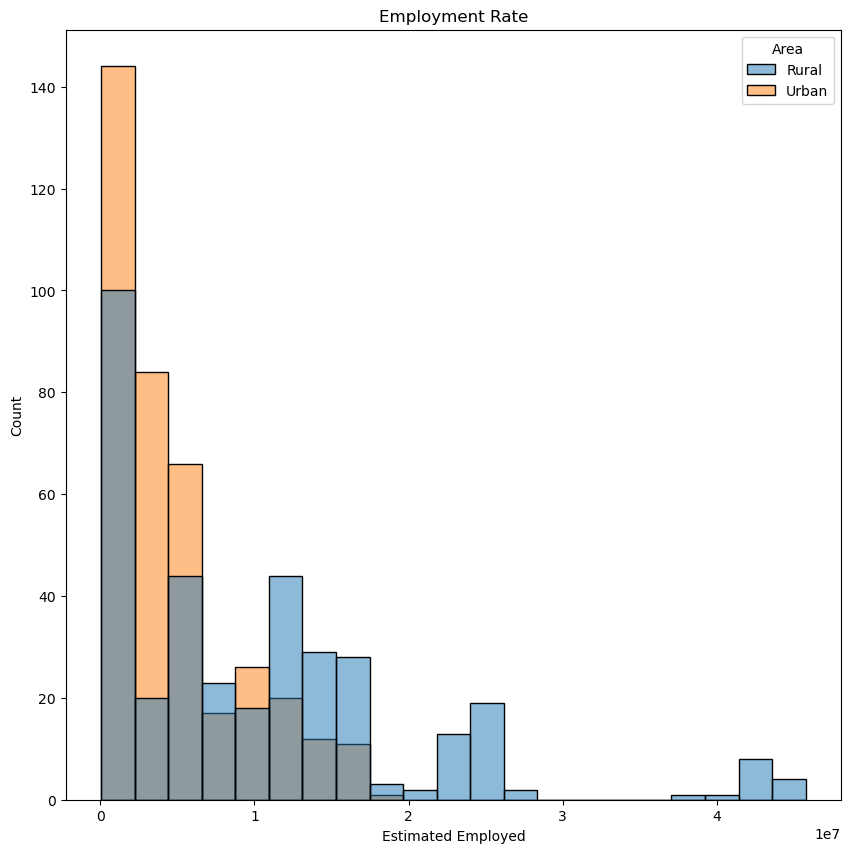

In [44]:
plt.figure(figsize=(10,10))
plt.title('Employment Rate')
sns.histplot(x='Estimated Employed', hue='Area', data=df)
plt.xlabel('Estimated Employed')
plt.ylabel('Count')
plt.show()


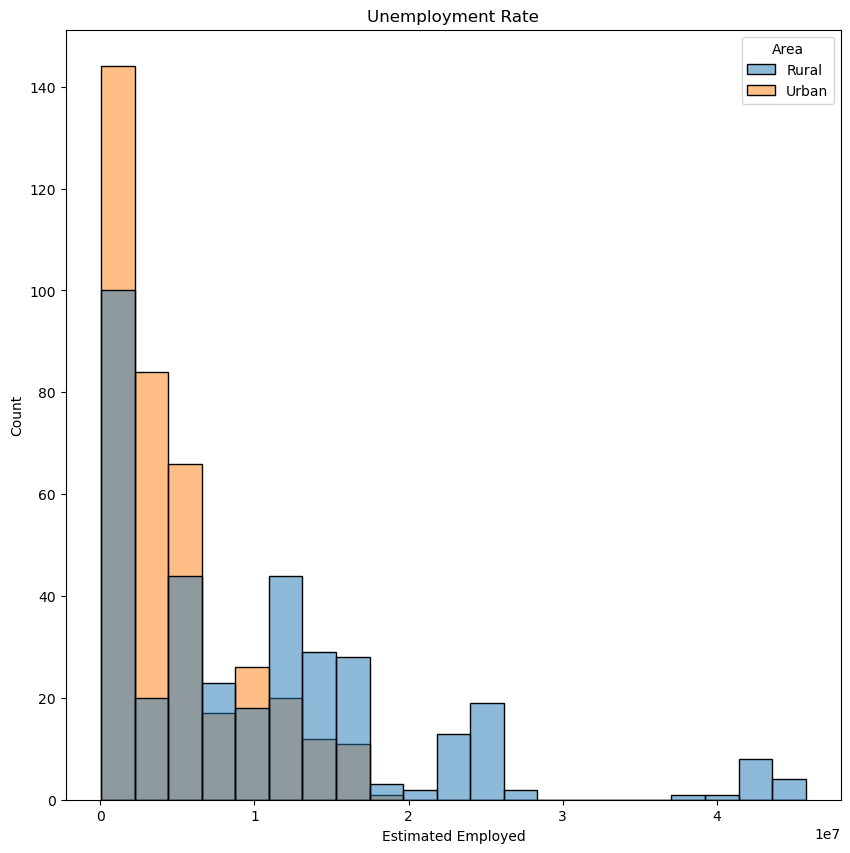

In [36]:
plt.figure(figsize=(10,10))
plt.title('Unemployment Rate')
sns.histplot(x='Estimated Employed', hue='Area', data=df)
plt.xlabel('Estimated Employed')
plt.ylabel('Count')
plt.show()


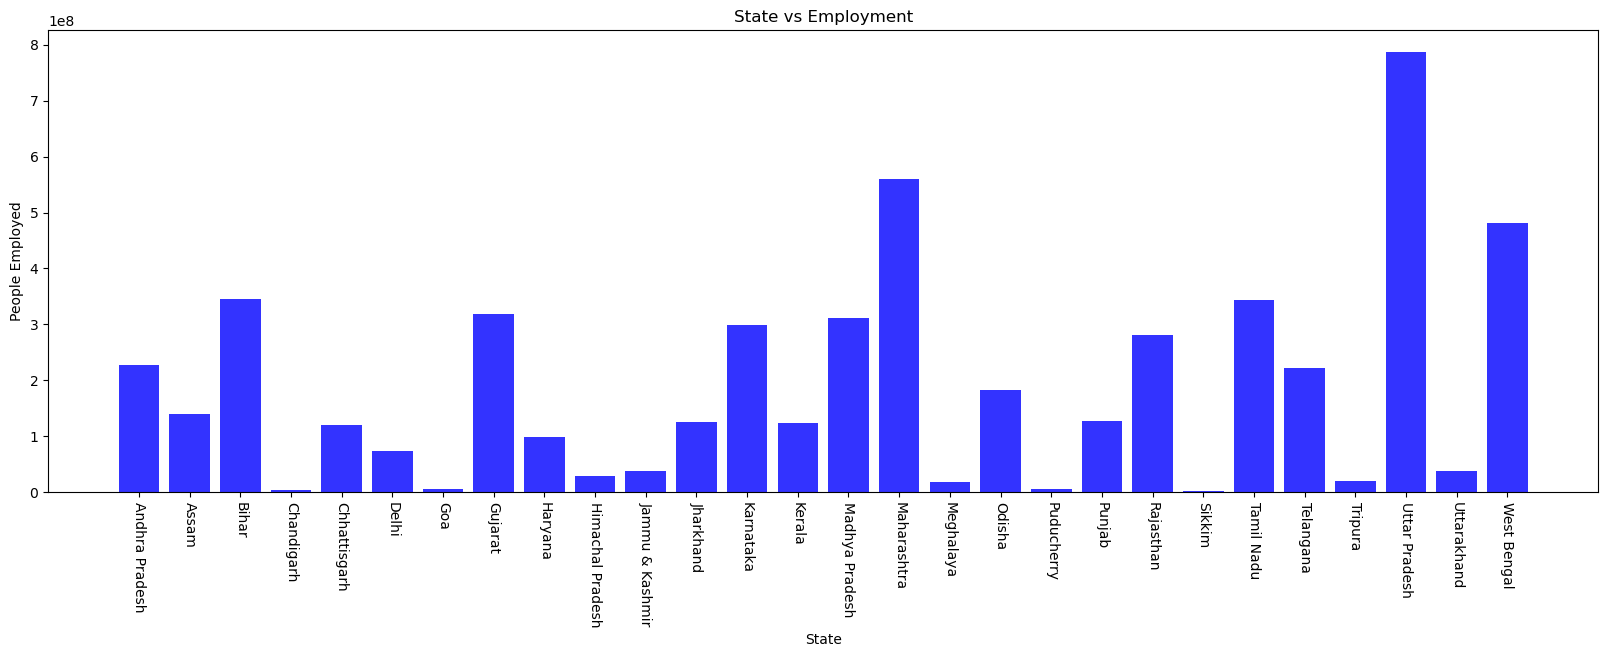

In [43]:
plt.figure(figsize=(20,6))
grouped_data = df.groupby('State')['Estimated Employed'].sum().reset_index()

plt.bar(grouped_data['State'], grouped_data['Estimated Employed'], color='blue', alpha=0.8)
plt.xticks(rotation=270)
plt.xlabel('State')
plt.ylabel('People Employed')
plt.title('State vs Employment')

plt.show()


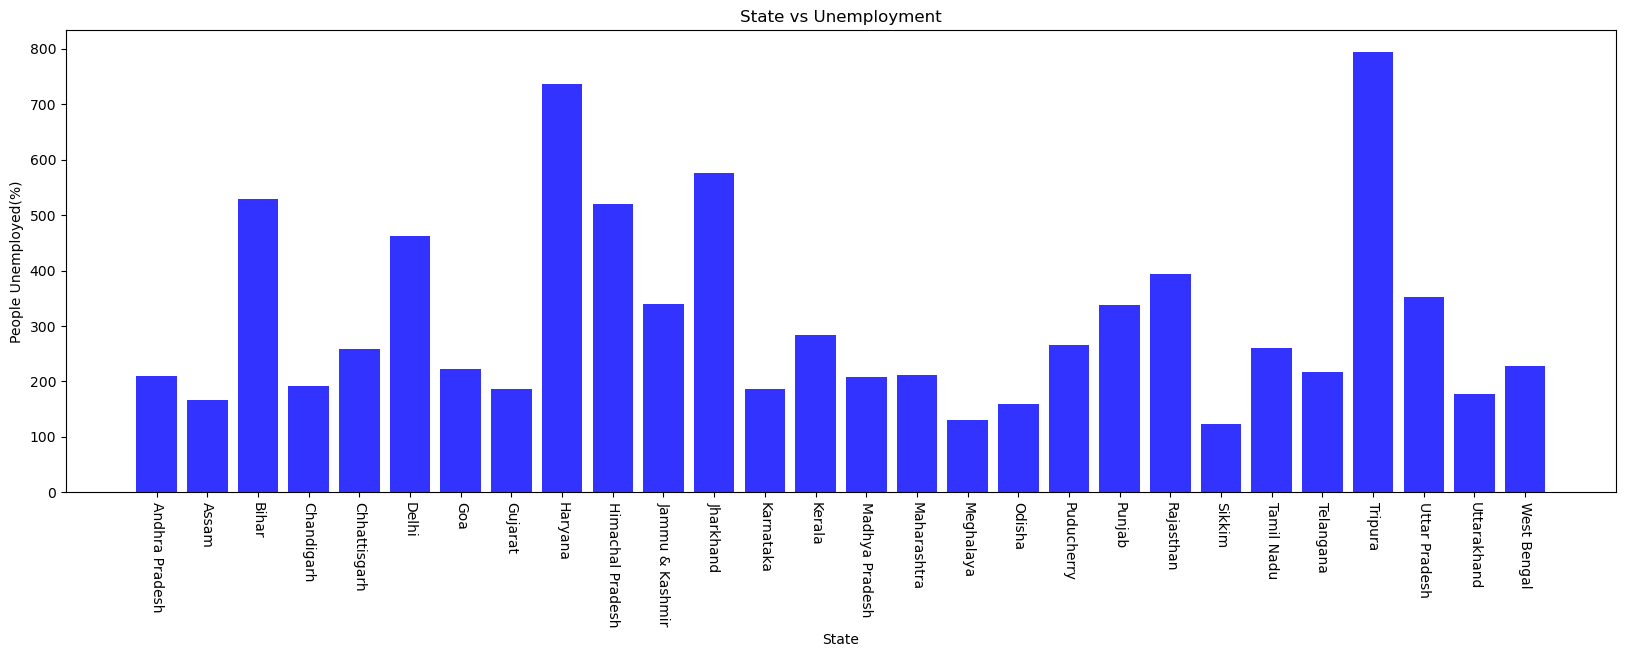

In [47]:
plt.figure(figsize=(20,6))
grouped_data = df.groupby('State')['Estimated Unemployment Rate (%)'].sum().reset_index()

plt.bar(grouped_data['State'], grouped_data['Estimated Unemployment Rate (%)'], color='blue', alpha=0.8)

plt.xlabel('State')
plt.xticks(rotation=270)
plt.ylabel('People Unemployed(%)')
plt.title('State vs Unemployment')

plt.show()


In [49]:
df.dtypes

State                                       object
 Date                                       object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [50]:
df['Estimated Employed (%)'] = (df['Estimated Employed']/df['Estimated Employed'].sum())*10000
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Estimated Employed (%)
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,22.506965
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,22.050682
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,22.671217
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,23.044458
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,22.990192


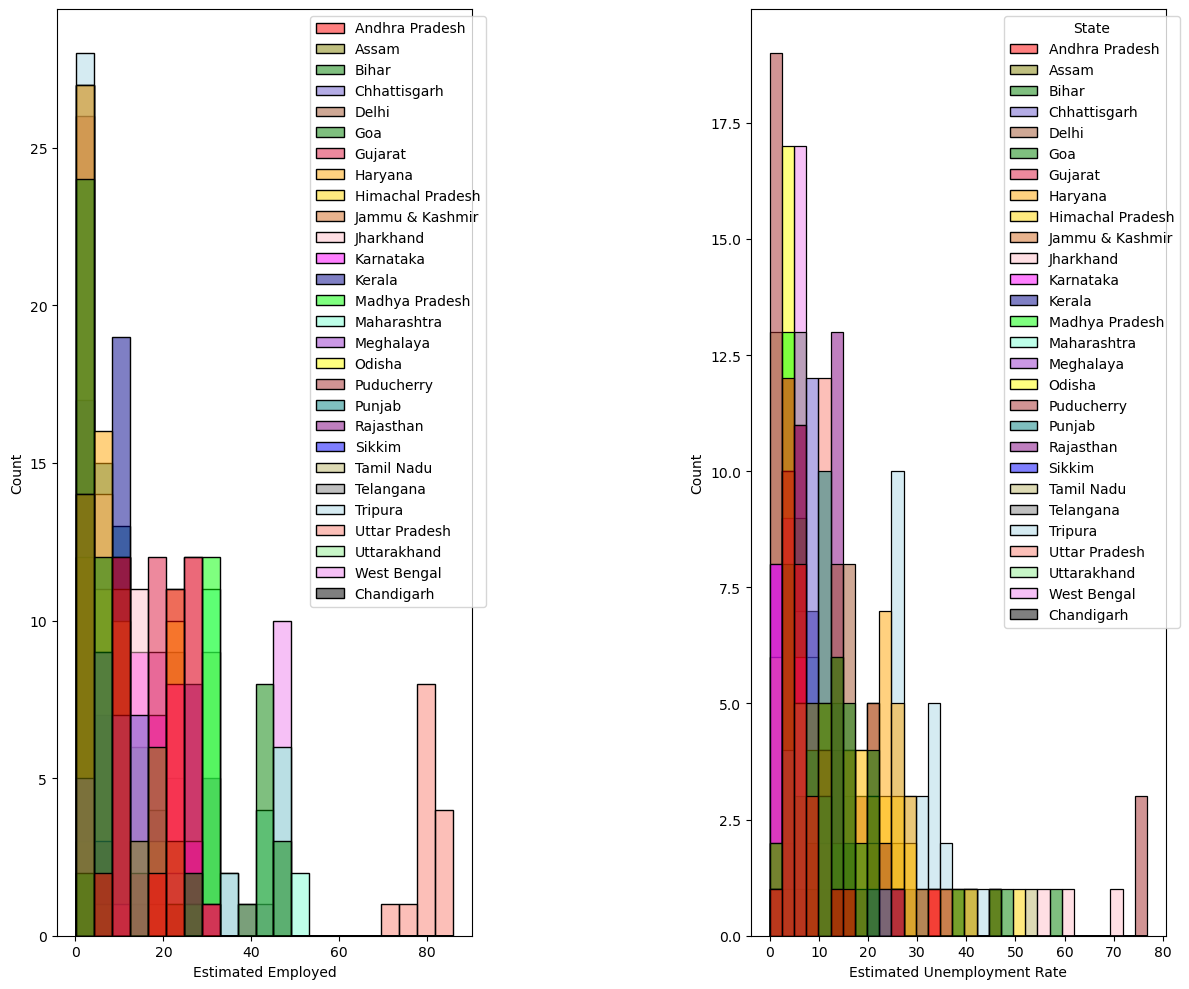

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
custompal = {'Chandigarh':'Black','Andhra Pradesh':'red', 'Sikkim':'blue', 'Jharkhand':'pink', 'Odisha':'yellow', 'Bihar':'green', 'Goa':'green', 'Rajasthan':'purple', 'West Bengal':'violet', 'Telangana':'grey', 'Haryana':'orange', 'Madhya Pradesh':'lime', 'Kerala':'darkblue', 'Himachal Pradesh':'gold', 'Karnataka':'magenta', 'Jammu & Kashmir':'chocolate', 'Gujarat':'crimson', 'Chhattisgarh':'slateblue', 'Uttarakhand':'lightgreen', 'Assam':'olive', 'Delhi':'sienna', 'Puducherry':'brown', 'Uttar Pradesh':'salmon', 'Tripura':'lightblue', 'Maharashtra':'aquamarine', 'Punjab':'teal', 'Meghalaya':'darkorchid', 'Tamil Nadu':'darkkhaki'}

p1 = sns.histplot(x='Estimated Employed (%)', hue='State', data=df, ax=axes[0], palette=custompal)
axes[0].set_xlabel('Estimated Employed')
axes[0].set_ylabel('Count')

p2 = sns.histplot(x='Estimated Unemployment Rate (%)', hue='State', data=df, ax=axes[1], palette=custompal)
axes[1].set_xlabel('Estimated Unemployment Rate')
axes[1].set_ylabel('Count')

legend = p1.get_legend()
legend.set_title('')
for text in legend.texts:
    text.set_fontsize(10)  

p1.get_legend().set_bbox_to_anchor((1.05, 1))
p2.get_legend().set_bbox_to_anchor((1.05, 1))

plt.tight_layout()
plt.show()